**Importing Libraries**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Salary.csv']


**Getting the data**

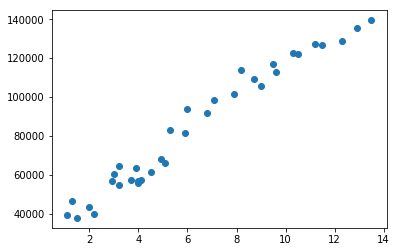

In [3]:

data=pd.read_csv("../input/Salary.csv")
x=data['YearsExperience']
y=data['Salary']
plt.scatter(x,y)
plt.show()

**Coding Gradient Descent**

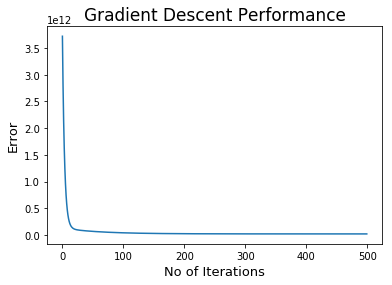

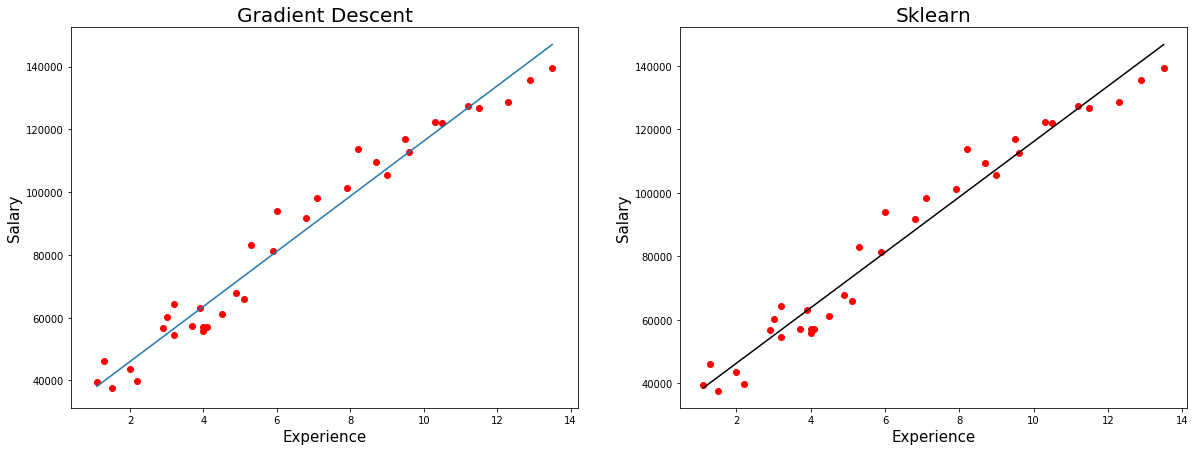

In [15]:

def hypothesis(x,gradient):
    return gradient[0]+x*gradient[1]

def cost(x,y,gradient):
    cost=0
    m=x.shape[0]
    for i in range(m):
        cost=cost+(hypothesis(x[i],gradient)-y[i])**2
    cost=cost/2*m
    return cost


def gradient_descent(x,y,gradient,alpha):
    m=x.shape[0]
    q0=0
    q1=0
    for i in range(m):
        q0=q0+(hypothesis(x[i],gradient)-y[i])
        q1=q1+(hypothesis(x[i],gradient)-y[i])*x[i]
    q0=q0/m
    q1=q1/m
    gradient[0]=gradient[0]-alpha*q0
    gradient[1]=gradient[1]-alpha*q1
    return cost(x,y,gradient)



def run():
    alpha=0.035
    gradient=[0,0]
    error=[]
    for i in range(500):
        error.append(gradient_descent(x,y,gradient,alpha))
        

    plt.plot(error)
    plt.xlabel('No of Iterations',fontsize=13)
    plt.ylabel('Error',fontsize=13)
    plt.title('Gradient Descent Performance',fontsize=17)
    plt.show()
    y_vals=x*gradient[1]+gradient[0]
    fig=plt.figure(figsize=(20,7))
    ax1=fig.add_subplot(1,2,1)
    ax1.plot(x,y_vals)
    ax1.scatter(x,y,color='red')
    ax1.set_xlabel('Experience',fontsize=15)
    ax1.set_ylabel('Salary',fontsize=15)
    ax1.set_title('Gradient Descent',fontsize=20)
    ax2=fig.add_subplot(1,2,2)
    reg=LinearRegression().fit(x.values.reshape((-1,1)),y.values.reshape(-1,1))
    y_pred=reg.predict(x.values[:,np.newaxis])
    ax2.scatter(x,y,color='red')
    ax2.plot(x,np.reshape(y_pred,(-1,1)),color='black')
    ax2.set_xlabel('Experience',fontsize=15)
    ax2.set_ylabel('Salary',fontsize=15)
    ax2.set_title('Sklearn',fontsize=20)
    plt.show()
    

    
run()


    


    


